1.Give a count of all videos currently out.

```mysql
SELECT count(inventory_id)
FROM rental r
WHERE r.return_date IS NULL
```

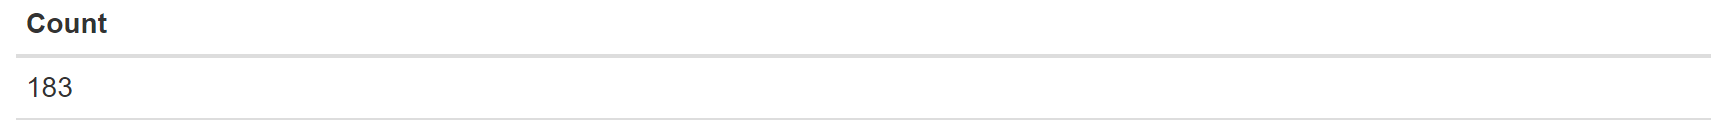

In [2]:
from IPython.display import Image
Image(filename='images/q1.png')

2.Make a list of all customer names who have videos out and how much they owe.

```mysql
SELECT good.customer_id,
       c.first_name,
       c.last_name,
       sum(amount) as amount_owed
FROM
  (SELECT DISTINCT *
   FROM
     (SELECT r.customer_id,
             p.amount,
             p.payment_id
      FROM payment p
      JOIN rental r ON r.customer_id = p.customer_id
      WHERE r.return_date IS NULL) AS foo) AS good
INNER JOIN customer c ON c.customer_id = good.customer_id
GROUP BY good.customer_id,
         c.first_name,
         c.last_name
ORDER BY good.customer_id
```


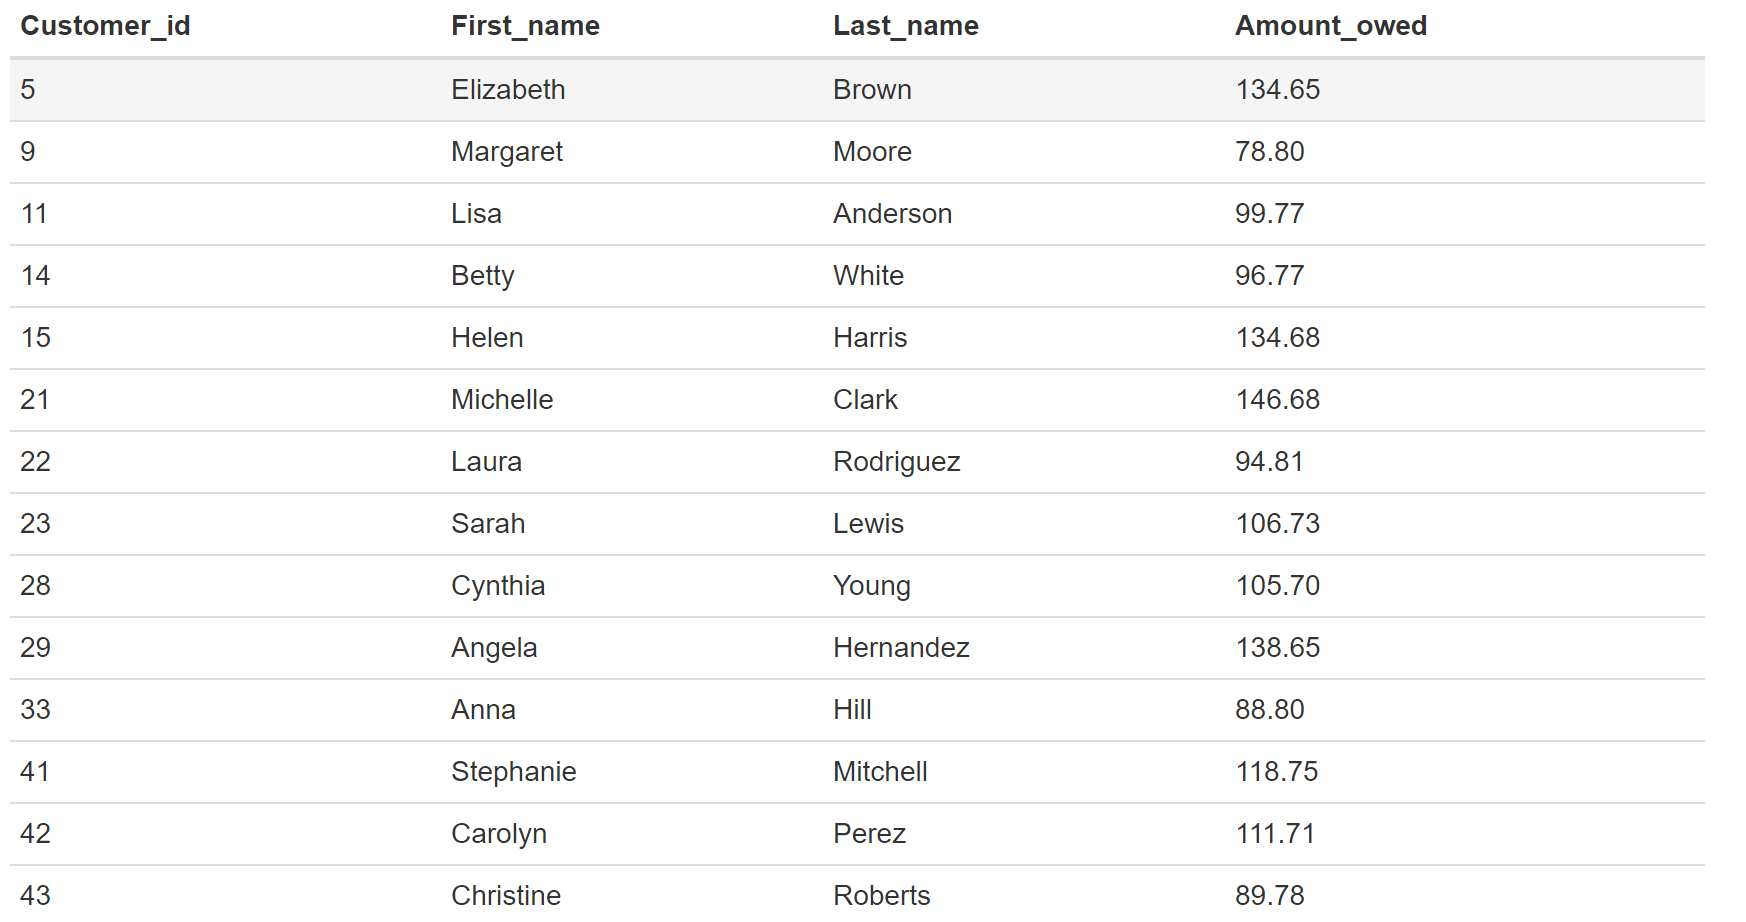

In [4]:
from IPython.display import Image
Image(filename='images/q2.png')

4.Using a $1 per day late fee. Find out which users owe the most assuming all rentals are a week long:
```mysql
SELECT 
       foo.first_name,
       foo.last_name,
       (duration) AS fee
FROM
  (SELECT r.rental_id,
          c.customer_id,
          c.first_name,
          c.last_name,
          (date(return_date) - date(rental_date) - 7) AS duration
   FROM rental r
   JOIN customer c ON c.customer_id = r.customer_id) AS foo
WHERE duration > 0
ORDER BY fee DESC
```



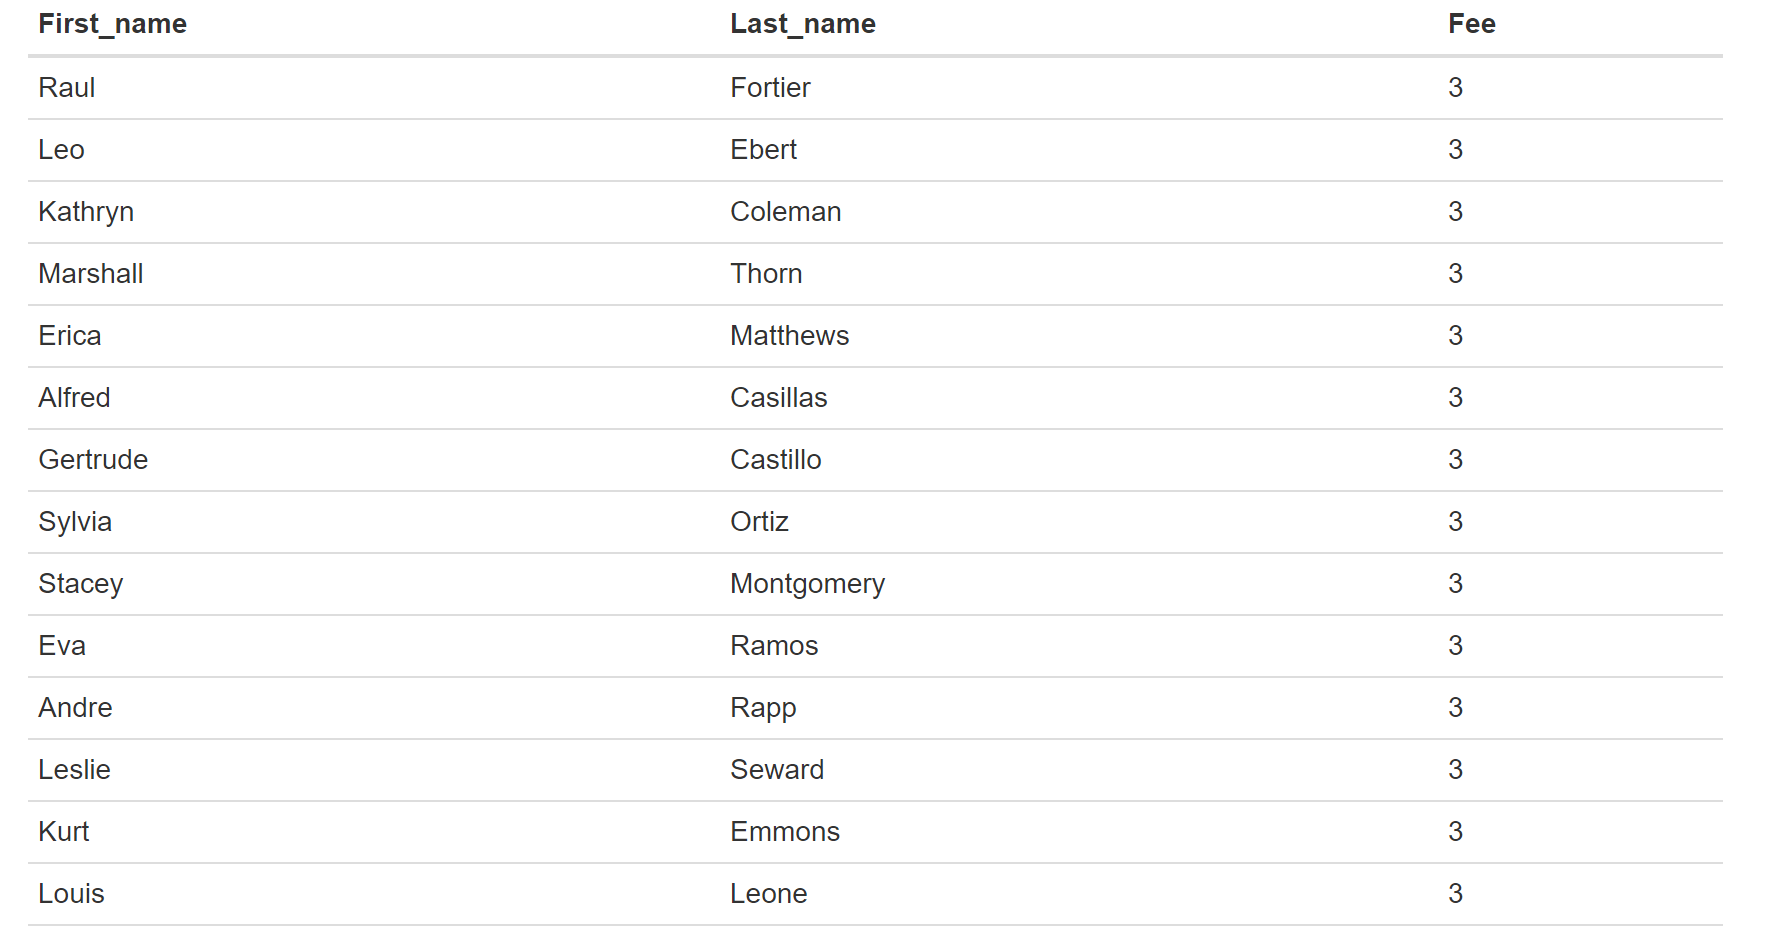

In [5]:
from IPython.display import Image
Image(filename='images/q3.png')

5.What hour of the day do people rent most?

```mysql
SELECT Hour,
       count(Hour)
FROM
  (SELECT extract(hour
                  FROM rental_date) AS Hour
   FROM rental) AS foo
GROUP BY Hour
ORDER BY foo.count DESC LIMIT 1
```

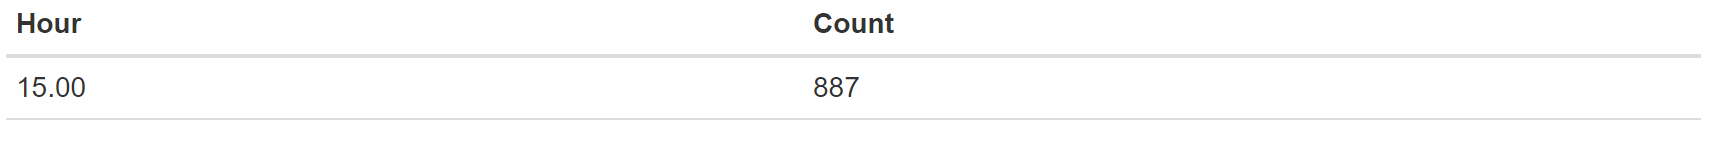

In [7]:
from IPython.display import Image
Image(filename='images/q4.png')